In [1]:
import migrids_lite as mlt
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# get all the data
all_data = pd.read_csv('example_data.tab', delimiter='\t')

# get the electric load from the data
electric_load = mlt.EnergyType.EnergyType('electric_load', all_data['load'])

# get the resource available
# the just 1 resource isn't enough to use the battery, so we make the resource bigger by a multiplier
solar_energy = mlt.EnergyType.EnergyType('resource', all_data['solar_energy'], multiplier=3)

In [3]:
# create a generator, this one is 400 kW
four_hund = mlt.Generator.Generator('four_hund', 400, 0.30, {0.50: 14, 1.00: 28})

# build the power house, this is required even if there's only 1 generator
power_house = mlt.Powerhouse.Powerhouse((four_hund,))

In [4]:
# build the battery called 'example_batt', rated input is 50 kW, output is 100 kW,
# and capacity is 150 kWh, minimum capacity percent is 30
battery = mlt.Storage.Storage('example_batt', 50, 100, 500, 0.3)

In [5]:
# calculate diesel only usage
diesel_src = mlt.System.System(electric_load, power_house, 'd')

calculating in diesel only mode


In [6]:
# calculate in resource offset mode
resource_offset = mlt.System.System(electric_load, power_house, 'r', resource_input=solar_energy)

calculating in resource offset mode


In [7]:
# calculate in storage time shifting mode
gen_shifting = mlt.System.System(electric_load, power_house, 's', storage=battery, resource_input=solar_energy)

calculating in storage timeshift


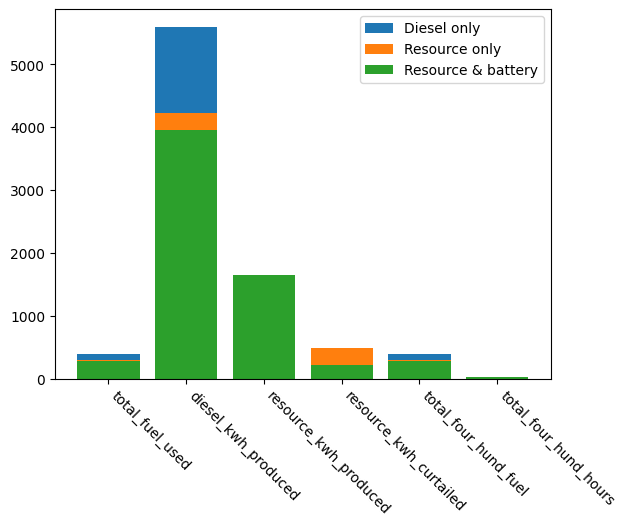

In [10]:
# plotting the values

plt.bar(diesel_src.fuel_usages.totals.keys(), diesel_src.fuel_usages.totals.values(), label='Diesel only')
plt.bar(resource_offset.fuel_usages.totals.keys(), resource_offset.fuel_usages.totals.values(), label='Resource only')
plt.bar(gen_shifting.fuel_usages.totals.keys(), gen_shifting.fuel_usages.totals.values(), label='Resource & battery')
plt.xticks(rotation = -45, ha='left')
plt.legend()
plt.show()